In [1]:
import pandas as pd
import numpy as np


In [2]:
df_patient = pd.read_csv('data_creation/101_ECG.csv')
df_patient = df_patient.iloc[:, 0]
df_patient

0        -0.345
1        -0.345
2        -0.345
3        -0.345
4        -0.345
          ...  
649995   -0.290
649996   -0.295
649997   -0.295
649998   -0.290
649999    0.000
Name: MLII, Length: 650000, dtype: float64

In [3]:
# Convert the Series to a NumPy array
data_array = df_patient.values

hz = 360
s = 1
t = hz*s

# Reshape the array
rows = len(data_array) // t
reshaped_data = data_array[:rows * t].reshape(rows, t)

# Create the DataFrame from the reshaped data
df_patient = pd.DataFrame(reshaped_data)

df_patient.head()


,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,...,-0.215,-0.205,-0.210,-0.215,-0.235,-0.255,-0.250,-0.250,-0.240,-0.255
1,-0.270,-0.275,-0.300,-0.300,-0.325,-0.320,-0.325,-0.315,-0.305,-0.305,...,1.085,1.165,1.040,0.765,0.480,0.220,0.015,-0.080,-0.115,-0.185
2,-0.235,-0.245,-0.235,-0.240,-0.260,-0.300,-0.345,-0.350,-0.365,-0.350,...,-0.465,-0.475,-0.475,-0.485,-0.490,-0.480,-0.475,-0.465,-0.475,-0.490
3,-0.475,-0.465,-0.475,-0.485,-0.485,-0.485,-0.475,-0.470,-0.465,-0.475,...,-0.455,-0.445,-0.465,-0.470,-0.460,-0.450,-0.430,-0.435,-0.425,-0.430
4,-0.435,-0.430,-0.420,-0.420,-0.420,-0.425,-0.410,-0.390,-0.375,-0.380,...,-0.495,-0.490,-0.495,-0.485,-0.470,-0.450,-0.440,-0.440,-0.450,-0.465


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_patient = scaler.fit_transform(df_patient)
df_patient = pd.DataFrame(df_patient)

In [5]:
import pywt

def madev(d, axis=None):
    'Mean absolute deviation of a signal'
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='sym4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = [pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:]]
    return pywt.waverec(coeff, wavelet, mode='per')


df_patient = wavelet_denoising(df_patient, wavelet='sym4', level=2)
df_patient = pd.DataFrame(df_patient)


In [6]:
df_patient

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.541677,0.541342,0.540829,0.540233,0.539902,0.539580,0.539286,0.538919,0.537987,0.536802,...,0.540575,0.540024,0.540024,0.540247,0.540480,0.540767,0.541044,0.541281,0.541593,0.541839
1,0.568728,0.552854,0.539022,0.526825,0.519623,0.515242,0.512669,0.511719,0.511746,0.513118,...,0.818351,0.888851,0.864696,0.805776,0.727088,0.641482,0.610666,0.598796,0.588869,0.583291
2,0.510975,0.514725,0.518002,0.521195,0.525166,0.528977,0.533012,0.536481,0.536771,0.535546,...,0.483427,0.484412,0.486594,0.489317,0.492407,0.495727,0.498646,0.501538,0.504471,0.507458
3,0.495633,0.496085,0.496599,0.497116,0.497469,0.497790,0.498057,0.498334,0.498912,0.499605,...,0.491933,0.492275,0.492656,0.493043,0.493437,0.493829,0.494187,0.494541,0.494869,0.495206
4,0.500866,0.502481,0.504274,0.506251,0.508093,0.509935,0.511888,0.513867,0.515782,0.517678,...,0.493525,0.496646,0.498117,0.498834,0.499434,0.499771,0.499901,0.500016,0.499834,0.499756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.512320,0.513418,0.514459,0.515570,0.516986,0.518440,0.520050,0.521585,0.522257,0.522559,...,0.507926,0.507986,0.508253,0.508616,0.509097,0.509639,0.510043,0.510467,0.510906,0.511423
1801,0.509624,0.511345,0.513293,0.515470,0.517601,0.519783,0.522116,0.524501,0.526804,0.529091,...,0.507160,0.508030,0.508322,0.508367,0.508515,0.508633,0.508545,0.508522,0.508380,0.508434
1802,0.514911,0.516815,0.518823,0.521061,0.523569,0.526153,0.529001,0.531816,0.533722,0.535258,...,0.512537,0.512893,0.512998,0.513005,0.513196,0.513424,0.513388,0.513423,0.513391,0.513572
1803,0.510175,0.512868,0.515753,0.518918,0.522217,0.525564,0.529162,0.532720,0.535511,0.537974,...,0.504469,0.505204,0.505599,0.505868,0.506372,0.506923,0.507153,0.507478,0.507698,0.508188


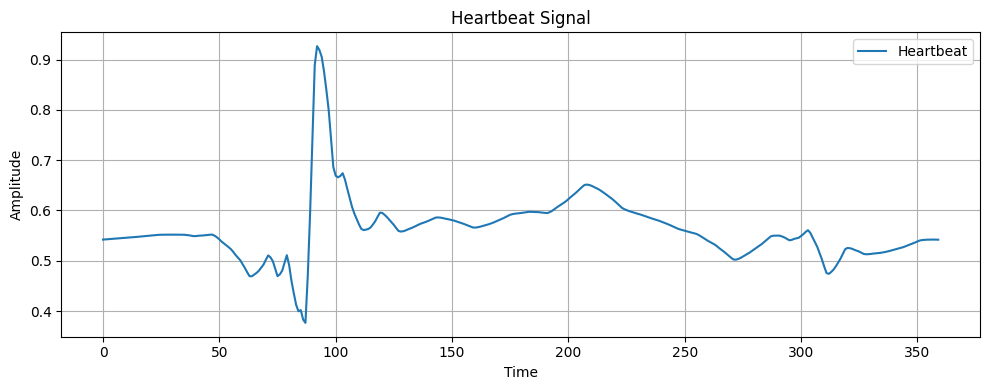

In [7]:
import matplotlib.pyplot as plt
import numpy as np

heartbeat_values = df_patient.iloc[897,]
heartbeat_values
# Creating a time axis for the 3600 points, assuming each point represents a unit of time
time_axis = np.arange(0, 360)

# Plotting the heartbeat
plt.figure(figsize=(10, 4))
plt.plot(time_axis, heartbeat_values, label='Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Heartbeat Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

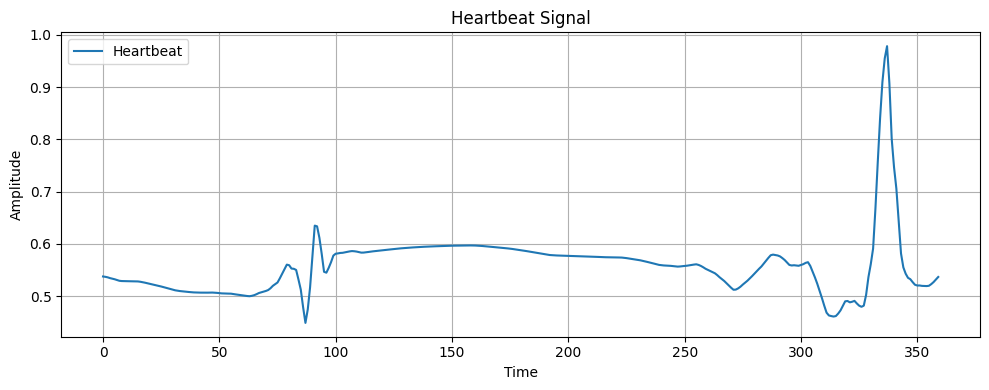

In [8]:
import matplotlib.pyplot as plt
import numpy as np

heartbeat_values = df_patient.iloc[600,]
heartbeat_values
# Creating a time axis for the 3600 points, assuming each point represents a unit of time
time_axis = np.arange(0, 360)

# Plotting the heartbeat
plt.figure(figsize=(10, 4))
plt.plot(time_axis, heartbeat_values, label='Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Heartbeat Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.models import load_model
loaded_model = load_model('Conv1D.h5')

2024-04-23 10:26:22.747007: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-23 10:26:22.747024: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-04-23 10:26:22.747028: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-04-23 10:26:22.747043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-23 10:26:22.747055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
# Use the model to make predictions
prediction = loaded_model.predict(df_patient)


 1/57 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step

2024-04-23 10:26:23.043397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [11]:
# Convert predictions to 0 or 1 based on the 0.5 threshold
predicted_classes = (prediction > 0.5).astype(int)

# Count the number of 1s and 0s 
# np.sum() on a boolean array gives the count of True values (which are considered as 1)
count_1s = np.sum(predicted_classes == 1)
count_0s = np.sum(predicted_classes == 0)

print(f"Count of 1s: {count_1s}")
print(f"Count of 0s: {count_0s}")

Count of 1s: 1110
Count of 0s: 695
